In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(6,3)}, style='whitegrid')
import scipy
from statsmodels.stats.weightstats import *

In [2]:
import scipy
import statsmodels

In [3]:
data = pd.read_csv('measures.txt')

In [4]:
data.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


### 1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков.

In [5]:
data.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [6]:
data.isna().sum() # Пропущенных значений в виде NA нет

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [7]:
data.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [8]:
data.describe() # Пропущенных значений в виде нулей тоже нет

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.333733e+01,3.232322e+01,6.430889e+01,-2.899370e+01,5.439572e+01,2.209956e+03,-7.092833e+01,4.330229e+01,5.691077e+01,4.525002e+01,2.423961e+01,3.623050e+01,3.549608e+01
std,4.336464e+01,2.027951e+01,2.968288e+01,6.223175e+01,2.323587e+01,1.874061e+03,6.660061e+01,9.159176e+01,2.001114e+01,1.948673e+01,1.940425e+00,7.673032e+01,2.506011e+01
min,-2.529093e+01,1.376190e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,1.410069e+01,-2.464667e+02,2.000000e+00
25%,1.209668e+01,1.860544e+01,3.937440e+01,-8.525315e+01,3.334926e+01,3.836995e+02,-1.192647e+02,1.096400e+00,3.900360e+01,2.877491e+01,2.309487e+01,-4.055462e-02,1.400000e+01
50%,4.752466e+01,1.926167e+01,6.356562e+01,-7.620751e+00,5.260343e+01,1.999976e+03,-5.073550e+01,2.992396e+01,5.760014e+01,3.972105e+01,2.411081e+01,2.089365e+01,2.900000e+01
75%,8.757509e+01,4.179416e+01,8.764565e+01,8.295827e-01,7.212174e+01,3.749966e+03,-2.980322e+00,1.131816e+02,7.169332e+01,5.869643e+01,2.591768e+01,9.801524e+01,5.700000e+01
max,1.330313e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,9.985647e+01,3.071420e+01,2.610057e+02,8.100000e+01


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1048575 non-null  float64
 1   coolant         1048575 non-null  float64
 2   stator_winding  1048575 non-null  float64
 3   u_d             1048575 non-null  float64
 4   stator_tooth    1048575 non-null  float64
 5   motor_speed     1048575 non-null  float64
 6   i_d             1048575 non-null  float64
 7   i_q             1048575 non-null  float64
 8   pm              1048575 non-null  float64
 9   stator_yoke     1048575 non-null  float64
 10  ambient         1048575 non-null  float64
 11  torque          1048575 non-null  float64
 12  profile_id      1048575 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 104.0 MB


In [10]:
# Оценим наличие выбросов

print(round(data.describe(),2))

              u_q     coolant  stator_winding         u_d  stator_tooth  \
count  1048575.00  1048575.00      1048575.00  1048575.00    1048575.00   
mean        53.34       32.32           64.31      -28.99         54.40   
std         43.36       20.28           29.68       62.23         23.24   
min        -25.29       13.76           18.59     -131.53         18.13   
25%         12.10       18.61           39.37      -85.25         33.35   
50%         47.52       19.26           63.57       -7.62         52.60   
75%         87.58       41.79           87.65        0.83         72.12   
max        133.03      101.60          141.36      131.47        111.95   

       motor_speed         i_d         i_q          pm  stator_yoke  \
count   1048575.00  1048575.00  1048575.00  1048575.00   1048575.00   
mean       2209.96      -70.93       43.30       56.91        45.25   
std        1874.06       66.60       91.59       20.01        19.49   
min        -275.55     -278.00     -293.

Наблюдения:

1. Высокую корреляцию имеют параметры stator_tooth и stator_winding (r = 0.97), stator_tooth и stator_yoke (r = 0.95), i_q и torque (r = 1);
2. Во всех случаях корреляция положительная.

##### Оценим, есть ли у параметров значения-выбросы

<AxesSubplot:ylabel='u_q'>

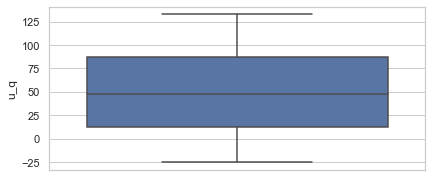

In [11]:
sns.boxplot(y='u_q', data=data)

<AxesSubplot:ylabel='coolant'>

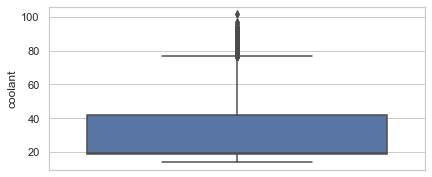

In [12]:
sns.boxplot(y='coolant', data=data)

<AxesSubplot:ylabel='stator_winding'>

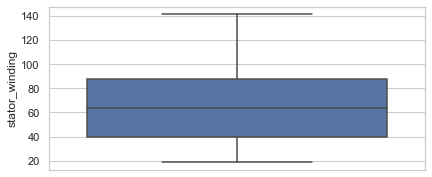

In [13]:
sns.boxplot(y='stator_winding', data=data)

<AxesSubplot:ylabel='u_d'>

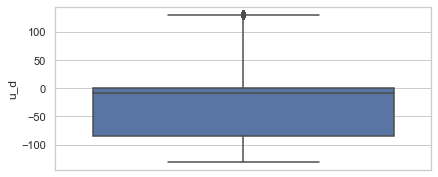

In [14]:
sns.boxplot(y='u_d', data=data)

<AxesSubplot:ylabel='stator_tooth'>

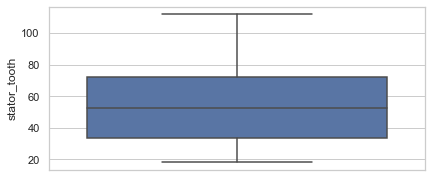

In [15]:
sns.boxplot(y='stator_tooth', data=data)

<AxesSubplot:ylabel='motor_speed'>

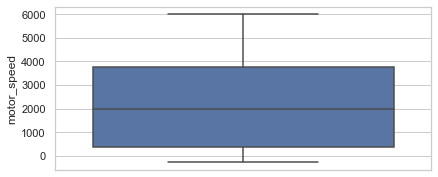

In [16]:
sns.boxplot(y='motor_speed', data=data)

<AxesSubplot:ylabel='i_d'>

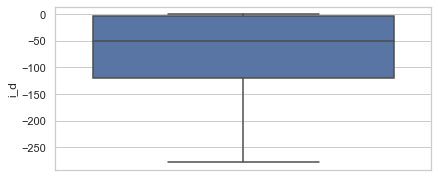

In [17]:
sns.boxplot(y='i_d', data=data)

<AxesSubplot:ylabel='i_q'>

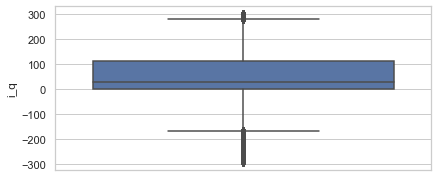

In [18]:
sns.boxplot(y='i_q', data=data)

<AxesSubplot:ylabel='pm'>

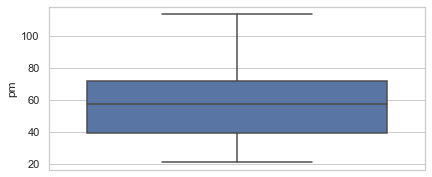

In [19]:
sns.boxplot(y='pm', data=data)

<AxesSubplot:ylabel='stator_yoke'>

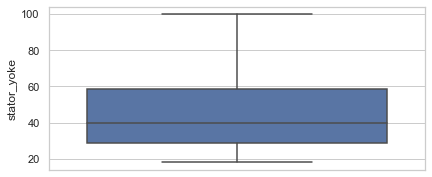

In [20]:
sns.boxplot(y='stator_yoke', data=data)

<AxesSubplot:ylabel='ambient'>

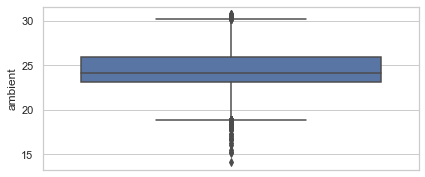

In [21]:
sns.boxplot(y='ambient', data=data)

<AxesSubplot:ylabel='torque'>

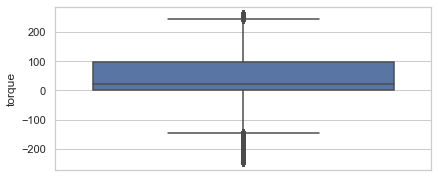

In [22]:
sns.boxplot(y='torque', data=data)

<AxesSubplot:ylabel='profile_id'>

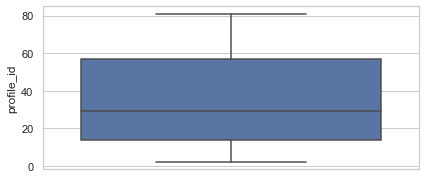

In [23]:
sns.boxplot(y='profile_id', data=data)

Наблюдение:

У параметров coolant, i_q, ambient и torque обнаружены выбросы. 
Сначала построим модель на полных данных, потом попробуем убрать выбросы и проверим, повлияет ли это на качество.

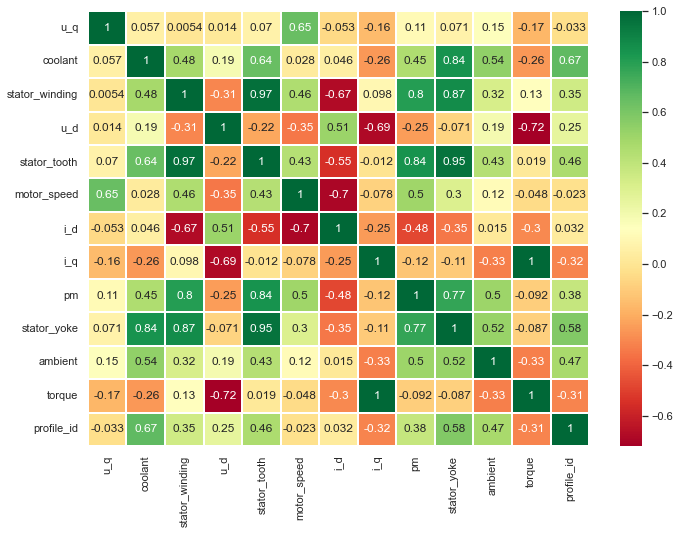

In [24]:
# Матрица корреляций признаков

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизуализируйте решения.

In [25]:
X = data['u_q']
y = data['motor_speed']

In [26]:
X

0          -0.450682
1          -0.325737
2          -0.440864
3          -0.327026
4          -0.471150
             ...    
1048570    48.159700
1048571    49.347272
1048572    50.191015
1048573    50.476838
1048574    50.837811
Name: u_q, Length: 1048575, dtype: float64

In [27]:
y

0             0.002866
1             0.000257
2             0.002355
3             0.006105
4             0.003133
              ...     
1048570    2096.735442
1048571    2039.850834
1048572    1989.249199
1048573    1928.984749
1048574    1874.340648
Name: motor_speed, Length: 1048575, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

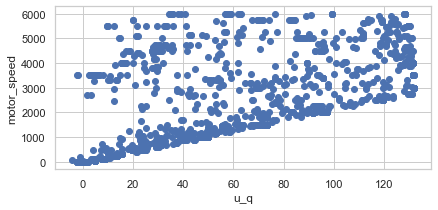

In [29]:
plt.scatter(X_train[:1500], y_train[:1500])
plt.xlabel('u_q')
plt.ylabel('motor_speed')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1))

LinearRegression()

In [32]:
lr.coef_

array([[28.08131357]])

In [33]:
lr.intercept_

array([712.38549905])

ValueError: x and y must have same first dimension, but have shapes (2,) and (1, 2)

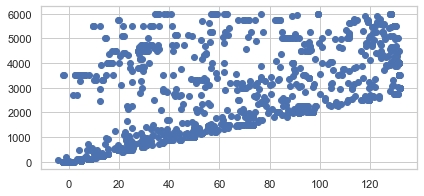

In [34]:
plt.scatter(X_train[:1500], y_train[:1500])

def f_line(x):
    return lr.coef_*x+lr.intercept_

x = [-30, 140]
y = f_line(x)

plt.plot(x, y)

plt.xlabel('u_q')
plt.ylabel('motor_speed')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (1, 2)

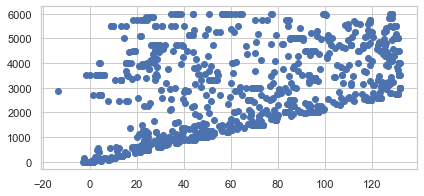

In [35]:
plt.scatter(X_test[:1500], y_test[:1500])

def f_line(x):
    return lr.coef_*x+lr.intercept_

x_line = [-30, 140]
y_line = f_line(x_line)

plt.plot(x_line, y_line)

plt.xlabel('u_q')
plt.ylabel('motor_speed')

plt.show()

In [36]:
y_train_predicted = lr.predict(X_train.array.reshape(-1, 1))
y_test_predicted = lr.predict(X_test.array.reshape(-1, 1))

In [37]:
np.array(y_test)

array([1499.98400879, 2302.46679707, 1959.98144531, ...,   99.96417999,
       3499.9699707 , 1233.90830757])

In [38]:
np.array(y_test_predicted)

array([[2774.74686508],
       [2962.09106407],
       [3286.51290797],
       ...,
       [ 829.77145071],
       [ 865.92550991],
       [2101.43846445]])

ValueError: x and y must have same first dimension, but have shapes (2,) and (1, 2)

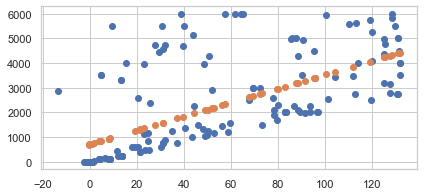

In [39]:
plt.scatter(X_test[:150], y_test[:150])
plt.scatter(X_test[:50], y_test_predicted[:50])

def f_line(x):
    return lr.coef_*x+lr.intercept_

x_line = [-30, 140]
y_line = f_line(x_line)

plt.plot(x_line, y_line)

plt.xlabel('u_q')
plt.ylabel('motor_speed')

plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(1150.9016995328916, 1150.2318089379596)

In [42]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(2029106.2853140153, 2030509.8217274148)

### 3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.

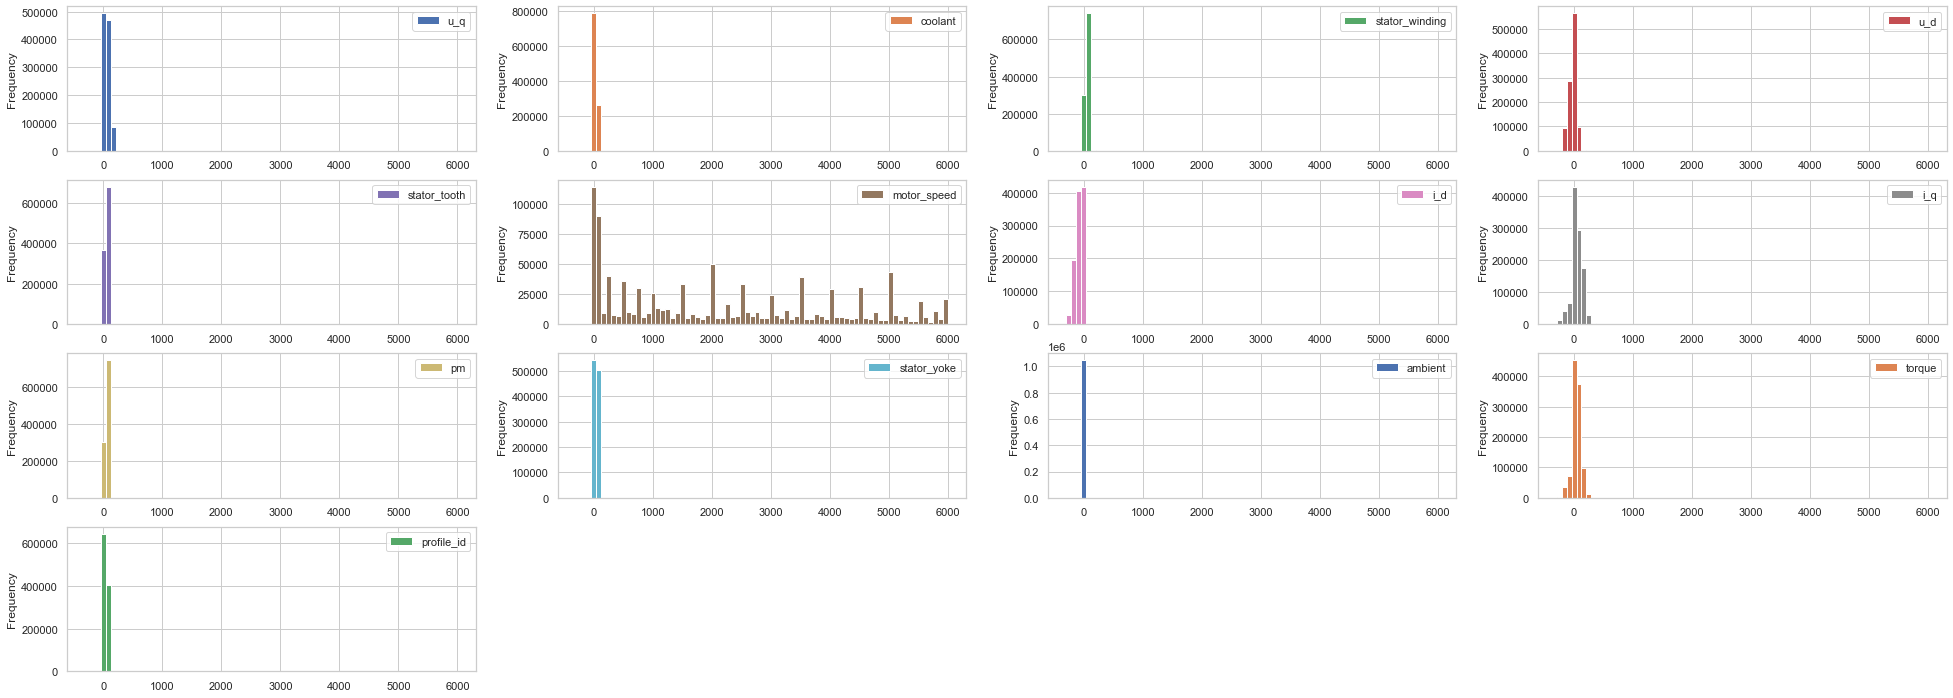

In [43]:
plt.rcParams['figure.figsize']=(30,25)
data.plot(kind='hist', bins=75, subplots=True, layout=(8,4), sharex=False, sharey=False)
plt.show()

#### Оценка коэффициента корреляции

In [44]:
correlation = data.corr()
correlation['motor_speed'].sort_values(ascending=False)

motor_speed       1.000000
u_q               0.649764
pm                0.500871
stator_winding    0.455259
stator_tooth      0.433838
stator_yoke       0.296248
ambient           0.118738
coolant           0.028211
profile_id       -0.023263
torque           -0.048141
i_q              -0.077513
u_d              -0.350639
i_d              -0.696822
Name: motor_speed, dtype: float64

Наблюдение:

значения параметра motor_speed с некоторыми данными имеет положительную корреляцию, а с некоторыми отрицательную.

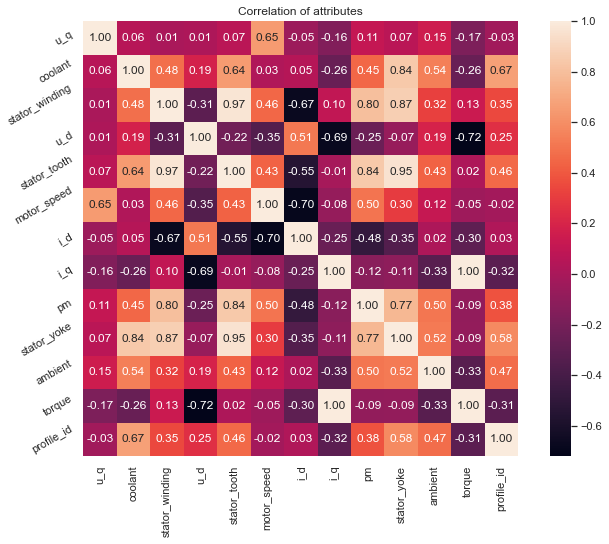

In [45]:
plt.figure(figsize=(10,8))
plt.title('Correlation of attributes')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

#### Создание векторов признаков и целевой переменной

In [46]:
X = data.drop(['motor_speed'], axis=1)
y = data['motor_speed']

#### Делим данные на отдельные наборы для обучения и тестирования

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
X_train.shape, X_test.shape

((838860, 12), (209715, 12))

In [233]:
X_train.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
dtype: object

In [49]:
X_train.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [50]:
X_test.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [51]:
X_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
592908,31.058187,19.136200,58.810936,-40.799591,45.188618,-65.979332,172.999252,45.661900,35.488419,24.830076,139.184204,16
184386,4.235912,18.226608,19.423904,1.451926,18.707680,-1.999193,1.097641,23.920012,18.584953,22.218571,0.190463,3
1021782,98.709101,61.221979,91.709805,84.012625,81.162807,-125.726827,-53.930469,68.164407,71.507528,23.295992,-50.000354,62
59606,122.210220,19.300341,54.210556,-29.586216,50.061344,-4.817371,29.950377,74.632187,39.452286,20.932447,19.882008,32
93792,8.791241,18.669298,101.872696,-9.799631,71.138184,-122.973755,242.423553,35.351620,51.335346,22.396553,206.784775,2


In [52]:
X_test.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
875680,72.921327,91.053011,102.295896,107.028548,95.137349,-102.863991,-117.958078,74.654065,91.749761,26.101854,-1.020678e+02,55
1046906,126.063086,23.089439,72.117858,12.658546,60.330576,-111.758811,-11.184589,66.744684,45.593834,25.778196,-1.056658e+01,65
646861,-2.326880,54.874329,55.833854,0.341376,54.167575,-2.000999,1.097317,66.773043,53.499610,27.647413,1.540877e-225,74
704385,-1.665663,26.909153,42.073881,2.356090,38.822230,-2.000496,1.098661,68.558748,35.353318,27.983994,-3.730081e-109,68
798051,48.952776,60.078057,101.116862,-62.505981,81.997295,-58.384975,159.641166,70.884085,70.888119,25.102537,1.233485e+02,80


#### Feature scaling

In [53]:
cols = X_train.columns

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [56]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [57]:
X_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.514270,-0.649985,-0.184687,-0.189046,-0.395674,0.074673,1.415477,-0.561968,-0.500365,0.304462,1.341012,-0.778171
1,-1.132618,-0.694867,-1.511536,0.489891,-1.535377,1.034999,-0.461489,-1.648808,-1.368020,-1.041430,-0.470422,-1.297005
2,1.045321,1.426654,0.923593,1.816556,1.152606,-0.822121,-1.062332,0.562893,1.348498,-0.486159,-1.124533,1.057702
3,1.587104,-0.641885,-0.339662,-0.008859,-0.185958,0.992699,-0.146451,0.886206,-0.296899,-1.704260,-0.213792,-0.139606
4,-1.027602,-0.673023,1.265955,0.309091,0.721160,-0.780799,2.173511,-1.077361,0.313059,-0.949703,2.222016,-1.336915


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [245]:
y_pred = knn.predict(X_test)

In [246]:
y_pred

array([ 3.05978842e+03,  5.71261551e+03, -1.75942142e-03, ...,
        3.84296318e+03,  3.99995688e+03,  2.98325780e+03])

In [97]:
y_pred_train = knn.predict(X_train)

#### Проверка на переобучение и недообучение

In [106]:
print('Training set score: {:0.4f}'.format(knn.score(X_train, y_train)))
print ('Test set score: {:0.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9998
Test set score: 0.9995


#### Сравнение точности модели с нулевой точностью

### 4. Сгенерируйте новые признаки:

Нормализация вектора тока (корень квадратный из суммы токов);
нормализация вектора напряжения (корень квадратный из суммы напряжения);
полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения);
эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

### 5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.